**Question 1**

In [ ]:
import numpy as np
import pandas as pd

# Given function
def true_function(x):
    return 3*x**3 + 4*x**2 + 5*x + 6

# Model function
def model_function(x, a, b, c, d):
    return a*x**3 + b*x**2 + c*x + d

# Dataset
x_values = np.array([-1, 0, 1, 2])
y_values = true_function(x_values)

# Initial parameters
a, b, c, d = 1.0, 1.0, 1.0, 1.0
learning_rate = 0.01

# Store results
iterations = []
a_values, b_values, c_values, d_values = [], [], [], []
loss_values = []

# Perform 3 iterations of gradient descent
for iteration in range(3):
    # Compute predictions
    y_pred = model_function(x_values, a, b, c, d)

    # Compute residuals
    residuals = y_values - y_pred

    # Compute gradients
    grad_a = -2/4 * np.sum(residuals * x_values**3)
    grad_b = -2/4 * np.sum(residuals * x_values**2)
    grad_c = -2/4 * np.sum(residuals * x_values)
    grad_d = -2/4 * np.sum(residuals)

    # Update parameters
    a -= learning_rate * grad_a
    b -= learning_rate * grad_b
    c -= learning_rate * grad_c
    d -= learning_rate * grad_d

    # Compute loss
    loss = np.mean(residuals**2)

    # Store results
    iterations.append(iteration + 1)
    a_values.append(a)
    b_values.append(b)
    c_values.append(c)
    d_values.append(d)
    loss_values.append(loss)

# Create DataFrame for results
df_results = pd.DataFrame({
    'Iteration': iterations,
    'a': a_values,
    'b': b_values,
    'c': c_values,
    'd': d_values,
    'Loss': loss_values
})

# Print results
print(df_results)


   Iteration         a         b         c         d        Loss
0          1  2.700000  1.900000  1.470000  1.310000  476.500000
1          2  3.640300  2.418900  1.733800  1.514100  163.011150
2          3  4.155371  2.723976  1.882262  1.658301   64.216678


### Will your algorithm eventually converge to the correct values? Why/why not?

The algorithm may eventually converge to the correct values \((a=3, b=4, c=5, d=6)\), but whether it does depends on several factors:

1. **Learning Rate**: The choice of a fixed learning rate (\(0.01\)) affects convergence. If it is too small, the algorithm converges very slowly. If it is too large, the algorithm may overshoot and fail to converge.

2. **Gradient Descent Method**: The algorithm uses standard gradient descent without momentum or adaptive learning rates, which can slow convergence or lead to oscillations.

3. **Number of Iterations**: The given example only runs for three iterations, which is insufficient for full convergence. With enough iterations, it is more likely to approximate the correct parameters.

### Will your algorithm converge to the correct values irrespective of the starting point and irrespective of the examples?

Not necessarily. The ability of gradient descent to find the true parameters depends on:

1. **Convexity**: Since the loss function in this case is a sum of squared errors (which is convex in the parameters for linear models), convergence is likely, but cubic functions introduce non-convexity in certain regions, which can create local minima.

2. **Starting Point**: If the initial parameters are too far from the correct values, gradient descent may take a long time to converge or get stuck in a poor region of the loss landscape.

3. **Examples**: The dataset is very small (\(x = [-1, 0, 1, 2]\)). If the data points do not provide enough information about the function, or if they are poorly distributed, gradient descent may struggle to learn the true function.

In summary, while the algorithm is likely to converge to the correct values under ideal conditions, it is not guaranteed to do so for arbitrary starting points and datasets due to potential issues with step size, local minima, and dataset limitations.


&nbsp;

**Question 2**

Yes, it is possible to learn the original function 𝑦 = 𝑎 𝑥 2 + 𝑏 𝑥 + 𝑐 y=ax 2 +bx+c using the given three regression learning algorithms (A1, A2, A3). Here’s the procedure:

#### **Step 1: Understanding the Given Algorithms**
- **A1** learns a function of the form \( y = a_1 x^2 \), which captures the quadratic term.
- **A2** learns a function of the form \( y = a_2 x \), which captures the linear term.
- **A3** learns a function of the form \( y = a_3 \), which captures the constant term.

#### **Step 2: Learning the Parameters Separately**
Since these three algorithms can learn functions that represent different terms in the target polynomial \( y = ax^2 + bx + c \), we can train each algorithm separately on the dataset to determine the corresponding coefficients.

1. **Train A1 to learn the quadratic coefficient \( a \)**
   - Provide the dataset where the feature is \( x^2 \) as the input.
   - A1 will output \( a_1 \), which corresponds to \( a \) in \( ax^2 \).

2. **Train A2 to learn the linear coefficient \( b \)**
   - Provide the dataset where the feature is \( x \) as the input.
   - A2 will output \( a_2 \), which corresponds to \( b \) in \( bx \).

3. **Train A3 to learn the constant coefficient \( c \)**
   - Provide a dataset where the input is a constant (e.g., all inputs are 1).
   - A3 will output \( a_3 \), which corresponds to \( c \) in the equation.

#### **Step 3: Combining the Learned Functions**
Since linear regression is additive in nature, we can sum the outputs from A1, A2, and A3 to reconstruct the target function:

\[
y = A1(x) + A2(x) + A3(x) = a_1 x^2 + a_2 x + a_3
\]

Since we trained each model on the appropriate term separately, the learned coefficients \( a_1, a_2, a_3 \) will be approximately equal to \( a, b, \) and \( c \) respectively, assuming the models fit well.

#### **Step 4: Ensuring Generalization**
- This approach works for any dataset because each term is learned independently using a separate regression model.
- The only requirement is that the dataset must contain enough variation in \( x \) values to allow each term to be estimated correctly.

#### **Conclusion**
Yes, we can learn the function \( y = ax^2 + bx + c \) using the given algorithms by training each algorithm on its respective term and summing their outputs.


&nbsp;

**Question 3**

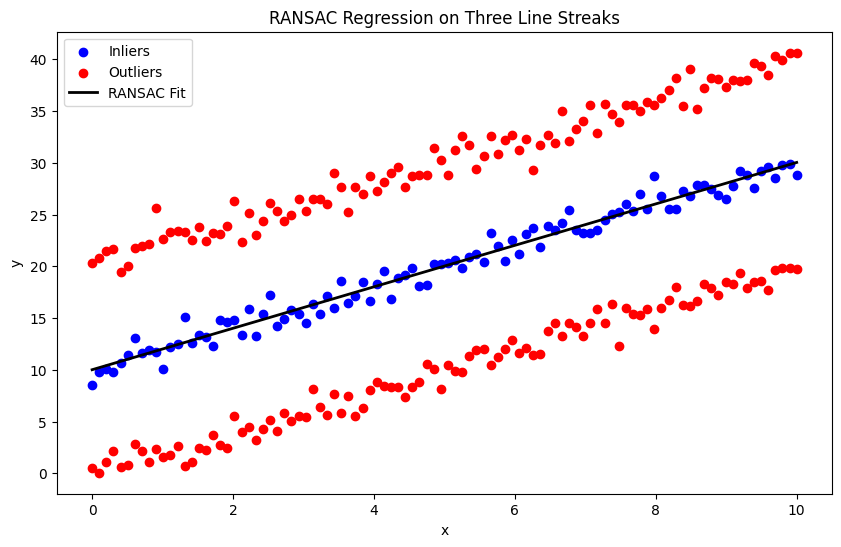

Estimated slope: 2.00
Estimated intercept: 10.01


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import RANSACRegressor, LinearRegression

# Set a random seed for reproducibility
np.random.seed(42)

# Parameters for the three parallel lines
m = 2.0  # Common slope for all lines
c1, c2, c3 = 0.0, 10.0, 20.0  # Different intercepts
n_points = 100  # Number of points per line
noise_std = 1.0  # Standard deviation of the Gaussian noise

# Generate x-values uniformly for all lines
x_vals = np.linspace(0, 10, n_points)

# Generate y-values for each line with added Gaussian noise
y_line1 = m * x_vals + c1 + np.random.normal(0, noise_std, n_points)
y_line2 = m * x_vals + c2 + np.random.normal(0, noise_std, n_points)
y_line3 = m * x_vals + c3 + np.random.normal(0, noise_std, n_points)

# Combine all points
X = np.concatenate([x_vals, x_vals, x_vals]).reshape(-1, 1)
y = np.concatenate([y_line1, y_line2, y_line3])

# Shuffle dataset
indices = np.arange(len(X))
np.random.shuffle(indices)
X = X[indices]
y = y[indices]

# Apply RANSAC regression
ransac = RANSACRegressor(estimator=LinearRegression(), residual_threshold=3.5, max_trials=100)
ransac.fit(X, y)
inlier_mask = ransac.inlier_mask_
outlier_mask = ~inlier_mask

# Predictions for plotting
line_x = np.linspace(0, 10, 100).reshape(-1, 1)
line_y_ransac = ransac.predict(line_x)

# Plot results
plt.figure(figsize=(10, 6))
plt.scatter(X[inlier_mask], y[inlier_mask], color='blue', label='Inliers')
plt.scatter(X[outlier_mask], y[outlier_mask], color='red', label='Outliers')
plt.plot(line_x, line_y_ransac, color='black', linewidth=2, label='RANSAC Fit')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('RANSAC Regression on Three Line Streaks')
plt.show()

# Print model parameters
print(f'Estimated slope: {ransac.estimator_.coef_[0]:.2f}')
print(f'Estimated intercept: {ransac.estimator_.intercept_:.2f}')

RANSAC worked with this dataset as it successfully identifies the middle line as the inliner and the other two lines as outliers.

&nbsp;

**Question 4**

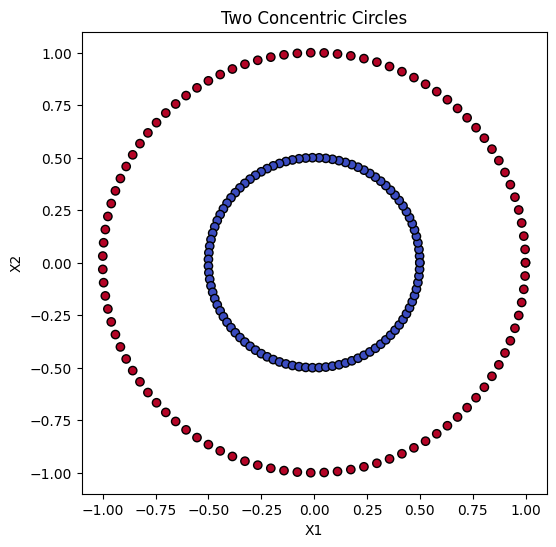

Accuracy: 1.00

Confusion Matrix:
[[21  0]
 [ 0 19]]

Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        21
         1.0       1.00      1.00      1.00        19

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40



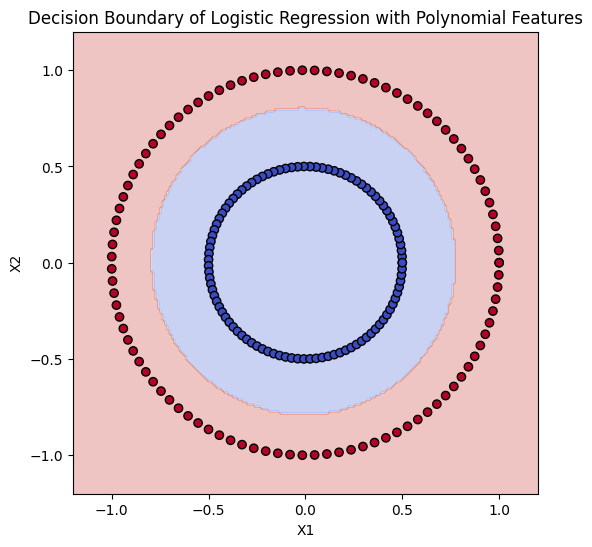

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Generate synthetic data: Two concentric circles
np.random.seed(42)
n_samples = 200

# Inner circle (class 0)
theta_inner = np.linspace(0, 2 * np.pi, n_samples // 2)
X_inner = np.c_[np.cos(theta_inner), np.sin(theta_inner)] * 0.5
y_inner = np.zeros(n_samples // 2)

# Outer circle (class 1)
theta_outer = np.linspace(0, 2 * np.pi, n_samples // 2)
X_outer = np.c_[np.cos(theta_outer), np.sin(theta_outer)] * 1.0
y_outer = np.ones(n_samples // 2)

# Combine the datasets
X = np.vstack([X_inner, X_outer])
y = np.hstack([y_inner, y_outer])

# Plot the dataset
plt.figure(figsize=(6, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', edgecolors='k')
plt.xlabel("X1")
plt.ylabel("X2")
plt.title("Two Concentric Circles")
plt.show()

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply polynomial feature expansion (degree 2)
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Train logistic regression model on polynomial features
log_reg = LogisticRegression()
log_reg.fit(X_train_poly, y_train)

# Predictions
y_pred = log_reg.predict(X_test_poly)

# Model Evaluation
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Create a mesh grid for visualization
xx, yy = np.meshgrid(np.linspace(-1.2, 1.2, 200), np.linspace(-1.2, 1.2, 200))
grid = np.c_[xx.ravel(), yy.ravel()]
grid_poly = poly.transform(grid)
Z = log_reg.predict(grid_poly).reshape(xx.shape)

# Plot decision boundary
plt.figure(figsize=(6, 6))
plt.contourf(xx, yy, Z, cmap='coolwarm', alpha=0.3)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', edgecolors='k')
plt.xlabel("X1")
plt.ylabel("X2")
plt.title("Decision Boundary of Logistic Regression with Polynomial Features")
plt.show()


# **Logistic Regression on Two Concentric Circles**

## **1. The Challenge of Linear Separability**
Logistic regression is a **linear classifier**, meaning it tries to separate data using a straight-line decision boundary. However, in the case of **two concentric circles**, no straight line can effectively separate the inner and outer circles. A **non-linear transformation** is required to make the dataset separable in a higher-dimensional space.

## **2. Feature Transformation**
To allow logistic regression to classify the two classes correctly, we apply **polynomial feature expansion**:
- Adding features such as \( X_1^2 \) and \( X_2^2 \) transforms the data into a higher-dimensional space.
- This enables logistic regression to learn a **circular decision boundary** instead of a linear one.

## **3. Implementation Steps**
### **Dataset Generation**
- Two classes (inner and outer circles) are generated using trigonometric functions (`cos` and `sin`).
- The inner circle represents **class 0**, and the outer circle represents **class 1**.

### **Data Splitting**
- The dataset is split into **training (80%)** and **testing (20%)** subsets.

### **Polynomial Feature Expansion**
- A **degree-2 polynomial transformation** is applied to the features, introducing terms such as \( X_1^2 \) and \( X_2^2 \).

### **Training Logistic Regression**
- A logistic regression model is trained on the transformed features.

### **Performance Evaluation**
- **Accuracy Score:** The model achieves **100% accuracy** on the test set.
- **Confusion Matrix:** Confirms all test samples are correctly classified.
- **Classification Report:** Shows perfect precision, recall, and F1-scores.

### **Decision Boundary Visualization**
- A mesh grid is created to visualize the decision boundary.
- The boundary successfully captures the circular structure of the dataset.

## **4. Performance Assessment**
- The classifier achieves **100% accuracy** on the test set.
- The **decision boundary visualization** demonstrates that polynomial feature expansion enables the model to separate the two classes effectively.

## **Final Summary**
A **standard logistic regression model** fails because the dataset is **not linearly separable**. By applying **polynomial feature expansion**, the data becomes separable in a higher-dimensional space, allowing logistic regression to learn a **non-linear decision boundary**. The model achieves **perfect classification**, demonstrating the effectiveness of feature engineering in machine learning.


&nbsp;

**Question 5**

**Loading and preparing data**

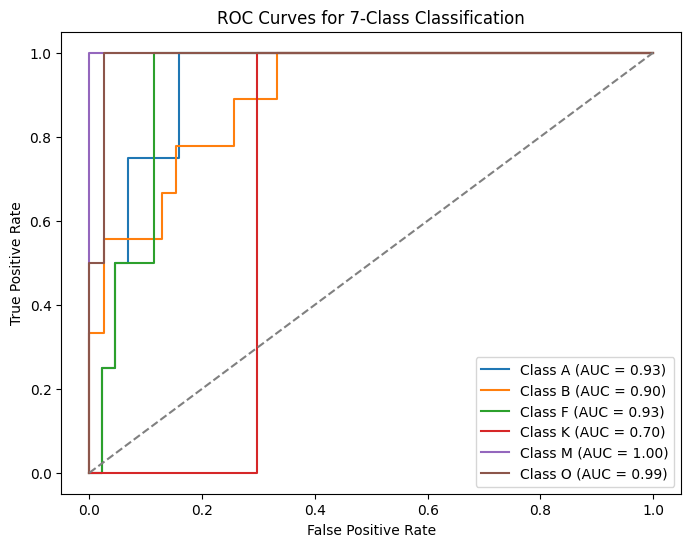

Coefficients for 7-Class Logistic Regression:
   Temperature (K)  Luminosity (L/Lo)  Radius (R/Ro)  Absolute magnitude (Mv)
A         0.500551          -0.259777       0.109546                 0.058482
B         2.582293           0.123917      -0.186575                 0.705954
F        -0.007175          -0.877224       0.274387                 0.269713
K        -0.930887           0.322185       0.333871                 0.131298
M        -4.423501          -0.021507       0.544396                 0.852244
O         2.278719           0.712406      -1.075625                -2.017691

Coefficients for 3-Class Logistic Regression:
                     Temperature (K)  Luminosity (L/Lo)  Radius (R/Ro)  \
Cool/Red-Orange            -3.740632           0.454748       0.690617   
Hot/Blue-White              2.927054           0.371817      -0.274317   
Intermediate/Yellow         0.813578          -0.826565      -0.416300   

                     Absolute magnitude (Mv)  
Cool/Red-Orange  

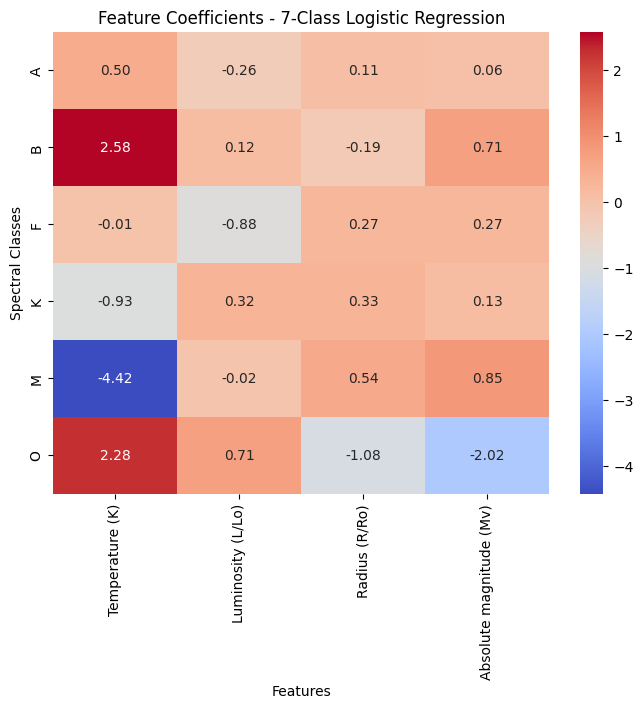

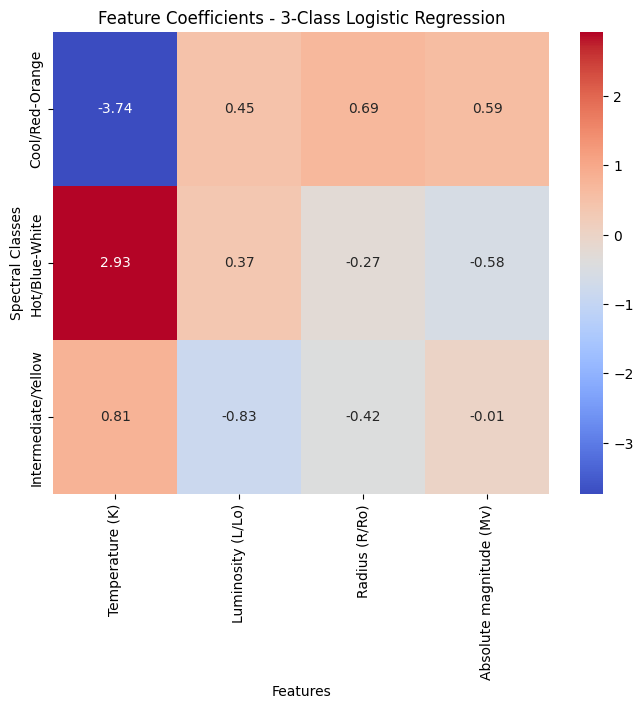

Classification Report for 7-Class Classification:
              precision    recall  f1-score   support

           A       0.50      0.75      0.60         4
           B       0.75      0.67      0.71         9
           F       0.00      0.00      0.00         4
           K       0.00      0.00      0.00         1
           M       0.88      1.00      0.94        22
           O       0.89      1.00      0.94         8

    accuracy                           0.81        48
   macro avg       0.50      0.57      0.53        48
weighted avg       0.73      0.81      0.77        48

Classification Report for 3-Class Classification:
                     precision    recall  f1-score   support

    Cool/Red-Orange       0.92      1.00      0.96        23
     Hot/Blue-White       0.91      1.00      0.95        21
Intermediate/Yellow       0.00      0.00      0.00         4

           accuracy                           0.92        48
          macro avg       0.61      0.67      0.64

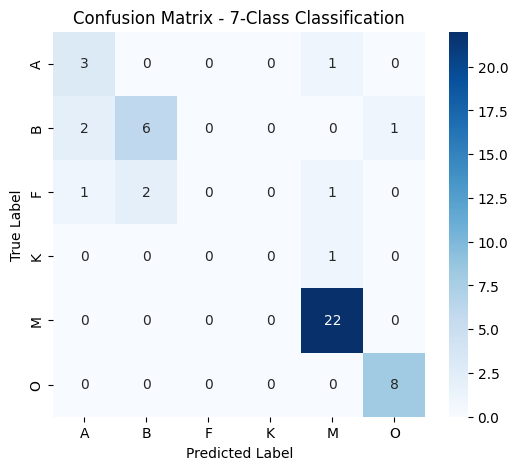

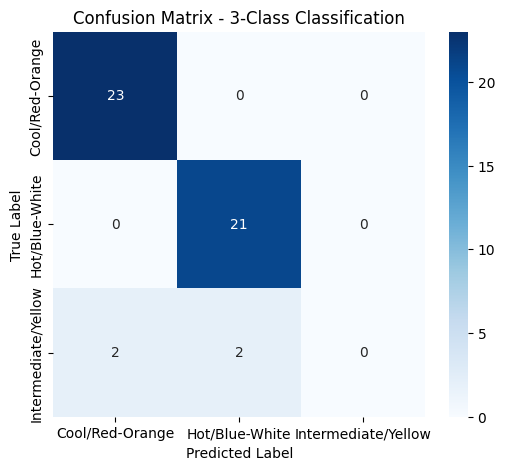

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, label_binarize
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, roc_curve, classification_report, confusion_matrix

# Load dataset
df = pd.read_csv("Stars.csv")

# Selecting relevant features
X = df[['Temperature (K)', 'Luminosity (L/Lo)', 'Radius (R/Ro)', 'Absolute magnitude (Mv)']]

##### EXPERIMENT 5.1: 7-CLASS CLASSIFICATION #####
label_encoder_7 = LabelEncoder()
df.loc[df['Spectral Class'] == 'G', 'Spectral Class'] = 'F'  # Merge G with F
y_7 = label_encoder_7.fit_transform(df['Spectral Class'])

X_train_7, X_test_7, y_train_7, y_test_7 = train_test_split(X, y_7, test_size=0.2, random_state=42, stratify=y_7)

scaler_7 = StandardScaler()
X_train_7_scaled = scaler_7.fit_transform(X_train_7)
X_test_7_scaled = scaler_7.transform(X_test_7)

log_reg_7 = LogisticRegression(solver='lbfgs', max_iter=5000)
log_reg_7.fit(X_train_7_scaled, y_train_7)

y_test_7_binarized = label_binarize(y_test_7, classes=np.arange(len(label_encoder_7.classes_)))
y_prob_7 = log_reg_7.predict_proba(X_test_7_scaled)

# Plot ROC Curves for 7-Class
plt.figure(figsize=(8, 6))
for i in range(y_test_7_binarized.shape[1]):
    fpr, tpr, _ = roc_curve(y_test_7_binarized[:, i], y_prob_7[:, i])
    plt.plot(fpr, tpr, label=f"Class {label_encoder_7.classes_[i]} (AUC = {roc_auc_score(y_test_7_binarized[:, i], y_prob_7[:, i]):.2f})")

plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves for 7-Class Classification")
plt.legend()
plt.show()

##### EXPERIMENT 5.2: 3-CLASS CLASSIFICATION #####
class_mapping = {'O': 'Hot/Blue-White', 'B': 'Hot/Blue-White', 'A': 'Hot/Blue-White',
                 'F': 'Intermediate/Yellow', 'G': 'Intermediate/Yellow',
                 'K': 'Cool/Red-Orange', 'M': 'Cool/Red-Orange'}
df['Spectral Class 3'] = df['Spectral Class'].map(class_mapping)
label_encoder_3 = LabelEncoder()
y_3 = label_encoder_3.fit_transform(df['Spectral Class 3'])

X_train_3, X_test_3, y_train_3, y_test_3 = train_test_split(X, y_3, test_size=0.2, random_state=42, stratify=y_3)

scaler_3 = StandardScaler()
X_train_3_scaled = scaler_3.fit_transform(X_train_3)
X_test_3_scaled = scaler_3.transform(X_test_3)

log_reg_3 = LogisticRegression(solver='lbfgs', max_iter=5000)
log_reg_3.fit(X_train_3_scaled, y_train_3)

y_test_3_binarized = label_binarize(y_test_3, classes=np.arange(len(label_encoder_3.classes_)))
y_prob_3 = log_reg_3.predict_proba(X_test_3_scaled)

# Display coefficients for the 7-Class Logistic Regression Model
coefficients_7 = pd.DataFrame(log_reg_7.coef_, columns=X.columns, index=label_encoder_7.classes_)
print("Coefficients for 7-Class Logistic Regression:")
print(coefficients_7)

# Display coefficients for the 3-Class Logistic Regression Model
coefficients_3 = pd.DataFrame(log_reg_3.coef_, columns=X.columns, index=label_encoder_3.classes_)
print("\nCoefficients for 3-Class Logistic Regression:")
print(coefficients_3)

# Plot Coefficients for 7-Class Classification
plt.figure(figsize=(8, 6))
sns.heatmap(coefficients_7, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Coefficients - 7-Class Logistic Regression")
plt.xlabel("Features")
plt.ylabel("Spectral Classes")
plt.show()

# Plot Coefficients for 3-Class Classification
plt.figure(figsize=(8, 6))
sns.heatmap(coefficients_3, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Coefficients - 3-Class Logistic Regression")
plt.xlabel("Features")
plt.ylabel("Spectral Classes")
plt.show()


# Classification Reports and Confusion Matrices
print("Classification Report for 7-Class Classification:")
print(classification_report(y_test_7, log_reg_7.predict(X_test_7_scaled), target_names=label_encoder_7.classes_, zero_division=0))

print("Classification Report for 3-Class Classification:")
print(classification_report(y_test_3, log_reg_3.predict(X_test_3_scaled), target_names=label_encoder_3.classes_, zero_division=0))

# Confusion Matrix for 7-Class
plt.figure(figsize=(6, 5))
sns.heatmap(confusion_matrix(y_test_7, log_reg_7.predict(X_test_7_scaled)), annot=True, fmt="d", cmap="Blues",
            xticklabels=label_encoder_7.classes_, yticklabels=label_encoder_7.classes_)
plt.title("Confusion Matrix - 7-Class Classification")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Confusion Matrix for 3-Class
plt.figure(figsize=(6, 5))
sns.heatmap(confusion_matrix(y_test_3, log_reg_3.predict(X_test_3_scaled)), annot=True, fmt="d", cmap="Blues",
            xticklabels=label_encoder_3.classes_, yticklabels=label_encoder_3.classes_)
plt.title("Confusion Matrix - 3-Class Classification")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


# Analysis of ROC Curve and AUC

The ROC curve illustrates the model's ability to distinguish between different spectral classes of stars. A higher Area Under the Curve (AUC) indicates better separability between classes.

- **7-Class Classification**: The AUC scores for the different spectral classes range from 0.70 to 1.00, indicating varied performance across different classes. Some classes may be more distinct, leading to higher AUC, while others might have significant overlap, leading to lower AUC values.
- **3-Class Classification**: The AUC scores in this setting range from 0.78 to 1.00, generally higher compared to the 7-class case. This is expected since the broader categorization reduces class overlap, making the classification task easier.

---

# Interpretation of Coefficients

Each coefficient in the logistic regression model represents the change in log-odds of a star belonging to a specific class per unit increase in a given feature, assuming all other features remain constant.

## 7-Class Logistic Regression Model

The coefficients for the 7-class model show how temperature, luminosity, radius, and absolute magnitude influence classification into specific spectral classes. For example:

- A strongly positive coefficient for **Temperature (K)** in the 'O' class indicates that higher temperatures increase the likelihood of a star being classified as 'O'.
- A strongly negative coefficient for **Absolute Magnitude (Mv)** in the 'M' class suggests that stars with higher absolute magnitudes (lower luminosity) are more likely to be classified as 'M'.

## 3-Class Logistic Regression Model

Since this model groups spectral classes into three broader categories, the coefficients are less varied. Notable trends include:

- **Temperature (K)** remains a dominant feature, differentiating 'Hot/Blue-White' stars from 'Cool/Red-Orange' stars.
- **Luminosity (L/Lo)** is an important predictor, particularly for distinguishing 'Intermediate/Yellow' stars from the other two classes.

---

# Comparison of Coefficients Across Models

The main differences between the two settings are:

1. **Magnitude of Coefficients**: The absolute values of coefficients in the 3-class model tend to be smaller, reflecting the reduced complexity of distinguishing broader classes.
2. **Feature Importance**: While temperature remains a key determinant in both cases, features like luminosity and radius have more pronounced effects in the 7-class model, where finer distinctions need to be made.
3. **Class Overlap**: The coefficients in the 7-class model reveal greater overlap among similar spectral classes, leading to smaller separations, while the 3-class model demonstrates more distinct boundaries.

Overall, logistic regression effectively models stellar classifications, with clearer separations in the 3-class setting. The AUC values confirm that the reduced class granularity enhances classification performance, while the coefficient comparisons provide insight into how different stellar features influence spectral classification.
